<a href="https://colab.research.google.com/github/kylefrankel/sentimentanalysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis


#Code Functionality

Although our code is 100% functional, we had to go away from our high-target expectations that we set for the project proposal. While we attempted various methods to extract data from coinmarketcap, we were not able to download or extract any data, which meant that we had to change our project. Instead, we opted to look at cryptocurrencies mentions within Twitter data. We were still able to manipulate various tutorials and prior homeworks, which shows how we understand the material and have pushed ourselves to continue learning. Because of these factors, we still believe that we deserve the full point for this part of the project.

#Intro/Problem Statement
We wanted to see if we could use information from Twitter to make larger profits from crypto currencies and reduce the risk of massive losses. Initially, our lowest grade target was just to gather data from Twitter and CoinMarketCap and see whether there is a correlation. For the medium target, we would successfully implement sentiment analysis, and for the high target, we could predict the changes in cryptocurrencies. Although we could not successfully gather data from CoinMarketCap, we were still able to complete sentiment analysis on tweets to see what people are thinking about certain cryptos, which means we are beyond the medium target. Even though we could not predict when changes in prices would occur because we did not have prices, we decided to continue our project by looking at the most occurring words when tweeting about Bitcoin and create a network of words, and also a social networks to still be able to visualize the data.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from operator import itemgetter

In [ ]:
#Accessing Twitter API
consumer_key= "FtDjaNoLJXSOk7E7svHimt1Yf"
consumer_secret = "ZC6eQp9rUupOz5hB1ciwTZtDeUE1VVTjkzF56JYs6Oo2lL3jmv"
access_token= '1249773678428028940-nBctoV0fqdfbiaNDubxg7BZooOVPxs'
access_token_secret = "H1ahgeJdkIhZZnCvLfSWhepgQiw9mSyE7EqXVHQLb3bmg"

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#Tutorial referenced https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/
# Part 1. Creating a sentiment analysis on Tweets about Bitcoin, Ethereum, and Binance
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:

# Create a custom search for Bitcoin and defined the number of tweets to 1000 most recent tweets.
# Made the search term start on January 1st 2021
search_term = "bitcoin+btc+Bitcoin"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.25,
 TextBlob("RT ArtisiaT As for the digital format its getting more hype than the painting and the burning put together Its a rising type of techn"))

In [ ]:
# Create list of polarity values and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.25,
 'RT ArtisiaT As for the digital format its getting more hype than the painting and the burning put together Its a rising type of techn']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.25,RT ArtisiaT As for the digital format its gett...
1,0.00,Bitcoin price in Canadian Dollar BTC XBT BTCCA...
2,0.00,The Current Bitcoin Price in USD is 5706431The...
3,-0.60,Bitcoin has been stagnant for almost three mon...
4,0.08,Market Id BTCAUDLast Price 728492724 Hour High...


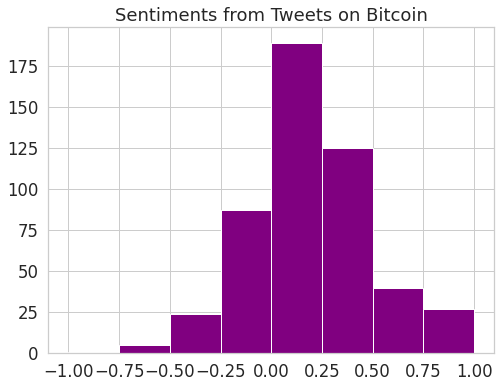

In [ ]:
#Creating a histogram that shows Bitcoin polarity values (The overall sentiment from twitter towards Bitcoin)
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Bitcoin")
plt.show()

Based on the histogram above for Bitcoin, it shows that the sentiment of tweets that include the words "Bitcoin", "BTC" or "bitcoin" for the 1000 most recent tweets. In this case, we see that overall the sentiment for Bitcoin is positve with few tweets falling bellow -0.25. Based on this information, we can conclude that at the moment when we captured the data, Bitcoin was increasing in price, which can be confirmed by looking and CoinMarketCap data. 

In [ ]:
# Create a custom search for Ethereum and defined the number of tweets to 1000 most recent tweets.
# Made the search term start on January 1st 2021
search_term = "ethereum+eth+Ethereum"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Ethereum hourly net stats5pm 6pm UTCblocks270avgDiff767 PHhashRate60511 THsavgSize5585 KBtxns73300ETH BTC crypto"))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Ethereum hourly net stats5pm 6pm UTCblocks270avgDiff767 PHhashRate60511 THsavgSize5585 KBtxns73300ETH BTC crypto']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.00,Ethereum hourly net stats5pm 6pm UTCblocks270a...
1,0.00,RT PillowGirl7 Boomer billmaher redefines the ...
2,0.00,Cotizaciones del momento DolarTodayUSD Bsf2850...
3,0.25,RT dopecryptocards and here we go Ethereum jus...
4,0.00,RT TheCryptoDog In my eyes the biggest advanta...


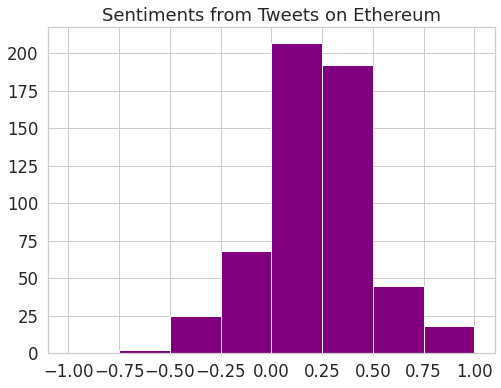

In [ ]:
#Creating a histogram that shows Ethereum polarity values (The overall sentiment from twitter towards Ethereum)
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Ethereum")
plt.show()

Based on the histogram above for Ethereum, it shows that the sentiment of tweets that include the words "Ethereum", "eth" or "ethereum" for the 1000 most recent tweets. In this case, we see that overall the sentiment for Ethereum is neutural with most tweets falling around 0 and 0.25. Compared to Bitcoin, Ethereum appears to have more postive sentiment towards it on May 10th. This is due to less tweets falling in the negative polarity.  

In [ ]:
# Create a custom search for Binance and defined the number of tweets to 1000 most recent tweets.
# Made the search term start on January 1st 2021
search_term = "BINANCE COIN+binance coin+BNB"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.5,
 TextBlob("#BNB as a coin has evolved over the years. With so many usecases and innovations, I believe it will beat BTC and Et… "))

In [ ]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.5,
 '#BNB as a coin has evolved over the years. With so many usecases and innovations, I believe it will beat BTC and Et… ']

In [ ]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.500000,#BNB as a coin has evolved over the years. Wit...
1,0.433333,RT @WalidHa45800754: #safemoon community we ne...
2,0.100000,RT @SafemoonWarrior: HOLDERS \n✅Wrapped BNB: 1...
3,0.433333,RT @WalidHa45800754: #safemoon community we ne...
4,0.255682,RT @jazz_coin: We are excited to introduce our...


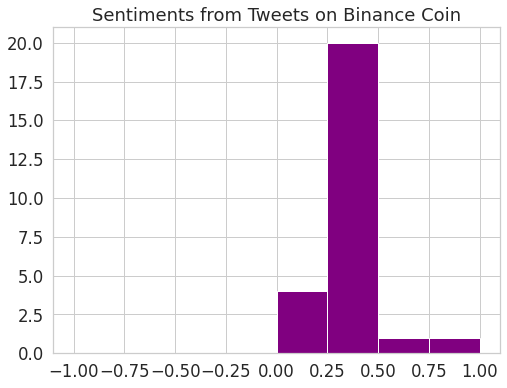

In [ ]:
#Creating a histogram that shows Binance polarity values (The overall sentiment from twitter towards Binance)
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Binance Coin")
plt.show()

Based on the histogram above for Binance coin, it shows that the sentiment of tweets that include the words "Binance", "bin" or "binance" for the 1000 most recent tweets. In this case, we see that overall the sentiment for Binance is highly postive with no tweets falling below 0. This graph was actually not expected since on May 5th there was a high negative sentiment towards Binance coin with many  tweets falling at -1.0. This was due to an overall negative cap growth for Binance. However, in the past couple of days Binance has been doing better and they have been making bigger initatives. This a great example of our initial theory that shows that when there is a negative sentiment towards a cryptocurrency the value of the coin decreases. However, when the sentiment becomes positive the value of the coin also increases most of the times. 

In [ ]:
#Part 2. A network of words. To show which are the most occuring words when people mention Bitcoin, BTC, btc, or bitcoin.
#Followed a tutorial from: (https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/)
# Create a custom search for Bitcoin and defined the number of tweets to 1000 most recent tweets.
# Made the search term start on January 1st 2021
#We also set the language to only look at tweets in English
search_term = "Bitcoin+bitcoin+btc+BTC"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2021-01-01').items(1000)

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [ ]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ['Bitcoin', 'bitcoin', 'btc', 'BTC']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('rt', '@phemex_official:'),
 ('@phemex_official:', 'next'),
 ('next', 'pizza'),
 ('pizza', 'day,'),
 ('day,', "we'd"),
 ("we'd", 'like'),
 ('like', 'give'),
 ('give', 'back'),
 ('back', 'one'),
 ('one', 'ogs'),
 ('ogs', '10,000'),
 ('10,000', '$btc'),
 ('$btc', 'transaction.'),
 ('transaction.', '💸'),
 ('💸', 'help'),
 ('help', 'us'),
 ('us', 'fin…')]

In [ ]:
# Original tweet without URLs
tweets_no_urls[0]

"RT @Phemex_official: On the next Pizza Day, we'd like to give back to one of the bitcoin OGs with a 10,000 $BTC transaction. 💸\n\nHelp us fin…"

In [ ]:
# Clean tweet 
tweets_nsw_nc[0]

['rt',
 '@phemex_official:',
 'next',
 'pizza',
 'day,',
 "we'd",
 'like',
 'give',
 'back',
 'one',
 'ogs',
 '10,000',
 '$btc',
 'transaction.',
 '💸',
 'help',
 'us',
 'fin…']

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams and print out the 20 most common bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('buy', 'earn'), 70),
 (('earn', '#bitcoin'), 70),
 (('#bitcoin', 'via'), 70),
 (('via', 'new'), 70),
 (('new', 'trading'), 70),
 (('trading', 'strategy'), 70),
 (('strategy', "i'm"), 69),
 (("i'm", 'ready'), 69),
 (('ready', 'show'), 68),
 (('show', '10'), 65),
 (('#bitcoin', '#btc'), 60),
 (('$btc', '$eth'), 58),
 (('10', 'new/old'), 58),
 (('may', '10,'), 40),
 (('biggest', 'advantage'), 37),
 (('advantage', '$btc'), 37),
 (('10,', '2021'), 36),
 (('rt', '@ecoinometrics:'), 35),
 (('$eth', 'trust'), 35),
 (('trust', 'ethereum'), 34)]

In [ ]:
#Creating a dateframe for the 20 most common bigrams (this includes hashtags and words) and its count
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(buy, earn)",70
1,"(earn, #bitcoin)",70
2,"(#bitcoin, via)",70
3,"(via, new)",70
4,"(new, trading)",70
5,"(trading, strategy)",70
6,"(strategy, i'm)",69
7,"(i'm, ready)",69
8,"(ready, show)",68
9,"(show, 10)",65


In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [ ]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

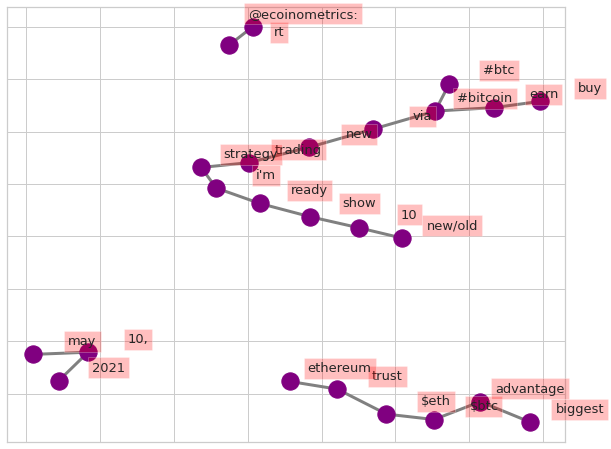

In [ ]:
#Creating a figure how bigrams connect in these tweets about bitcoin and set our k value to 2
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

Looking at the figure above, one of the connections is may 10, 2021. It makes sense that these words appear many times since the last time we ran this was May 10th. Additionally, it appears that when users mention Bitcoin in their tweets they also mention ethereum with other words including trust, advantage and biggest. It makes sense that these words are connected to ethereum and bitcoin since both cryptocurrencies were increasing in price at the time we scraped the data. Finally, people also use the words trading, strategy, earn and buy specifically when mentioning bitcoin since it is a currency that is able to be traded and has earned a positive net worth for many people that own bitcoin. 

In [ ]:
#Part 3. Social network
#Followed a tutorial from: https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1 only for this code cell
# We webscrapped the 17,000 most recent tweets that mention bitcoin. 
tweets = []

count = 1

for tweet in tw.Cursor(api.search, q="bitcoin", count=17000, since='2021-01-01').items(17000):
	
	print(count)
	count += 1

	try: 
		data = [tweet.created_at, tweet.id, tweet.text, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls']]
		data = tuple(data)
		tweets.append(data)

	except tw.TweepError as e:
		print(e.reason)
		continue

	except StopIteration:
		break
#Using the information on the 17,000 most recent tweets we created a dataframe with the columns created_at, tweet_id, tweet_text
#screen_name, name, account_creation_date, and url.
df = pd.DataFrame(tweets, columns = ['created_at','tweet_id', 'tweet_text', 'screen_name', 'name', 'account_creation_date', 'urls'])
#After creating to a dateframe we decided to convert it into a csv file to make the analysis easier
df.to_csv(r'bitcointwitter.csv',index=False)


Streaming output truncated to the last 5000 lines.
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
1

In [ ]:
#Loading in the csv that we created
file_link = 'bitcointwitter.csv'
df = pd.read_csv(file_link)
df

,created_at,tweet_id,tweet_text,screen_name,name,account_creation_date,urls
0,2021-05-10 21:15:05,1391864394183700481,Who’s selling their bitcoin conference Miami a...,leifaitken,Leif,Thu Jul 02 00:41:16 +0000 2020,"[{'url': 'https://t.co/hz84JOOi41', 'expanded_..."
1,2021-05-10 21:15:05,1391864392313098240,💰💰💰Earn #Crypto Together\nEarn up to 40% commi...,GabrielsChrista,Webtalk,Mon Apr 20 13:32:28 +0000 2020,"[{'url': 'https://t.co/3vwxYM5dZF', 'expanded_..."
2,2021-05-10 21:15:05,1391864391897948162,Market below 55k.. Be careful With market\nIf ...,open4crypto,Open4crypto,Thu Dec 17 16:46:37 +0000 2020,[]
3,2021-05-10 21:15:05,1391864391700676608,Thoughts on $BTC #Bitcoin! See H_E_D's idea on...,cryptocharts,CryptoCharts,Wed Sep 09 23:06:47 +0000 2015,"[{'url': 'https://t.co/i9lwztwgrO', 'expanded_..."
4,2021-05-10 21:15:04,1391864389649764353,"@JRNYcrypto If you purchase #Bitcoin now, even...",Mawlly9,Mawlly,Mon May 10 16:54:40 +0000 2021,"[{'url': 'https://t.co/Oz66PZAGj9', 'expanded_..."
...,...,...,...,...,...,...,...
16995,2021-05-10 19:22:04,1391835949554876421,RT @SatsTonight: You newcomers haven't realize...,TemporaryFellow,Temporary Fellow,Fri Apr 16 20:26:04 +0000 2021,[]
16996,2021-05-10 19:22:03,1391835946866327554,RT @ALTaylor26: Man $Shib just getting started...,1stMontgomery,Montgomery Universal🏳️‍🌈,Tue Jan 09 17:29:39 +0000 2018,[]
16997,2021-05-10 19:22:03,1391835946681733121,@peterboghossian @elonmusk To Musk posting on ...,JimWaxer,JimWaxer,Sun Nov 24 07:38:54 +0000 2019,"[{'url': 'https://t.co/nlUJ2ooDB5', 'expanded_..."
16998,2021-05-10 19:22:02,1391835943460507652,RT @bscShiba: Look whos just been listed on Co...,BillySaurus42,Billy Saurus,Wed Dec 27 01:25:03 +0000 2017,"[{'url': 'https://t.co/vMomBOnV5z', 'expanded_..."


In [ ]:
# We renamed our column so that it is easier to call
df=df.rename(columns={'Screen Name':'screen_name'})
# Made the screen_name (the users) our node
nodes= df['screen_name']
nodes

0             leifaitken
1        GabrielsChrista
2            open4crypto
3           cryptocharts
4                Mawlly9
              ...       
16995    TemporaryFellow
16996      1stMontgomery
16997           JimWaxer
16998      BillySaurus42
16999        ahinKanber2
Name: screen_name, Length: 17000, dtype: object

In [ ]:
#Create a empty list for edges and a dictionary for weights
edges = []
weight= {}
#Loop through each row in the data to fill in the lists above with user name, who they mentioned and the weight when talking about bitcoin
for index, row in df.iterrows():
  mentioning = row['screen_name']
  if '@' in row['tweet_text']:
   mentions = row['tweet_text']

  for node in nodes:
    if (mentioning) in weight:
      weight[(mentioning)]+=1
    else:
       weight[(mentioning)]=1 
    if node in mentions:
         edges.append((mentioning,node,weight[(mentioning)]))


edges

[('leifaitken', 'CoinFlipATM', 4754),
 ('leifaitken', 'CoinFlipATM', 11785),
 ('GabrielsChrista', 'CoinFlipATM', 4754),
 ('GabrielsChrista', 'CoinFlipATM', 11785),
 ('open4crypto', 'CoinFlipATM', 4754),
 ('open4crypto', 'CoinFlipATM', 11785),
 ('cryptocharts', 'CoinFlipATM', 4754),
 ('cryptocharts', 'CoinFlipATM', 11785),
 ('Mawlly9', 'JRNYcrypto', 3935),
 ('Mawlly9', 'JRNYcrypto', 4470),
 ('Airdropnotecom', 'Airdropnotecom', 8),
 ('Airdropnotecom', 'Airdropnotecom', 104),
 ('Airdropnotecom', 'Airdropnotecom', 446),
 ('Airdropnotecom', 'Airdropnotecom', 500),
 ('EtherEx_Crypto', 'biometrids', 437),
 ('EtherEx_Crypto', 'biometrids', 12935),
 ('trustnbtc', 'M0nty_BLK', 2957),
 ('trustnbtc', 'M0nty_BLK', 3486),
 ('trustnbtc', 'M0nty_BLK', 6052),
 ('trustnbtc', 'M0nty_BLK', 7328),
 ('trustnbtc', 'M0nty_BLK', 7584),
 ('trustnbtc', 'M0nty_BLK', 9826),
 ('My_Livin_Truth', 'RD_btc', 1710),
 ('My_Livin_Truth', 'RD_btc', 2586),
 ('My_Livin_Truth', 'RD_btc', 6948),
 ('jezfps', 'nmplol', 156),
 ('

In [ ]:
#This creates a directed graph using the the list of user names as the nodes and the people they mention as weighted edges
G = nx.DiGraph()
G.add_nodes_from(mentioning)
G.add_weighted_edges_from(edges)

In [ ]:
#Print the information about G
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
print("Manual calculation:", G.number_of_edges() / (G.number_of_nodes()*(G.number_of_nodes()-1)))

Name: 
Type: DiGraph
Number of nodes: 6544
Number of edges: 8106
Average in degree:   1.2387
Average out degree:   1.2387
Network density: 0.00018931559399974665
Manual calculation: 0.00018931559399974665


The network density is 0.000189. This means that only 0.0189% of possible edges are present in the graph, which is extremly sparse. 

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# in_degree only works for directed graphs
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

# out_degree only works for directed graphs
out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
sorted_in_degree_dict = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by in-degree centrality:")
for b in sorted_in_degree_dict[:20]:
    print(b)

sorted_out_degree_dict = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by out-degree centrality:")
for b in sorted_out_degree_dict[:20]:
    print(b)

sorted_betweenness_dict = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by betweenness centrality:")
for b in sorted_betweenness_dict[:20]:
    print(b)

sorted_eigenvector_dict = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 users ranked by eigenvector centrality:")
for b in sorted_eigenvector_dict[:20]:
    print(b)

Top 20 users ranked by in-degree centrality:
('BTC_Archive', 456)
('SalsaTekila', 363)
('JRNYcrypto', 235)
('PeterSchiff', 170)
('airdropinspect', 169)
('EylemCulculoglu', 142)
('BitcoinMagazine', 137)
('GiacoDiego', 128)
('CryptoVeneco', 124)
('BarrySilbert', 123)
('FieldYates', 119)
('dogeofficialceo', 108)
('BTCTN', 108)
('dogecoin_empire', 103)
('ecoinometrics', 93)
('AirdropStario', 70)
('business', 64)
('Selcoin', 60)
('bitcoin_brown', 59)
('Blockstream', 58)
Top 20 users ranked by out-degree centrality:
('bmurphypointman', 41)
('MollySa45224153', 26)
('FisheyJay', 21)
('Dogeunstoppable', 20)
('hexebabot', 19)
('thehodlers', 18)
('btcbot9', 16)
('bitcoinagile', 15)
('LisaJenny7428', 14)
('JurgenOstarhild', 14)
('BEARBULLWHALE', 13)
('bitcoin_btc_yes', 13)
('xaidaDEV', 12)
('DerekTMcKinney', 11)
('hobabot', 10)
('CryptoFaucets4', 10)
('snipercoins_com', 10)
('mira_hurley', 9)
('maxm_profit', 9)
('MustHaveCrypto', 9)
Top 20 users ranked by betweenness centrality:
('mira_hurley', 9.

With regard to this data, mira_hurly has the highest betweenness. This means that they have more control over this network since they are connected to different parts of the network and the most shortest paths, so more information passes through their node. Spinte8 has the highest eigenvector centrality. In other words, Spinte8 is a hub because it is connected to highly connected nodes. BTC_Archieve has the highest in-degree centrality. This means that in this netwoork they are the most mentioned person. Finally, bmurphypointman has the highest out-degree centrality. This means that they are the person who mentiones the most other users. 

In [ ]:
#Looking at mira_hurley centrality measures
DM_neighbors = []
DM_neighbors.append('mira_hurley')

#This goes through graph G to see if the from or to node includes mira_hurley, and if it does, it adds it to DM_neighbors
for edge in G.edges():
  if edge[0] == 'mira_hurley':
    DM_neighbors.append(edge[1])
  elif edge[1] == 'mira_hurley':
    DM_neighbors.append(edge[0])

DM_neighbors
H = G.subgraph(DM_neighbors)
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 21
Number of edges: 33
Average in degree:   1.5714
Average out degree:   1.5714


In [ ]:
G.nodes('mira_hurley')

NodeDataView({'a': None, 'h': None, 'i': None, 'n': None, 'K': None, 'b': None, 'e': None, 'r': None, '2': None, 'leifaitken': None, 'CoinFlipATM': None, 'GabrielsChrista': None, 'open4crypto': None, 'cryptocharts': None, 'Mawlly9': None, 'JRNYcrypto': None, 'Airdropnotecom': None, 'EtherEx_Crypto': None, 'biometrids': None, 'trustnbtc': None, 'M0nty_BLK': None, 'My_Livin_Truth': None, 'RD_btc': None, 'jezfps': None, 'nmplol': None, 'BaldBitcoin': None, 'gregzaj1': None, 'Re_Tweet': None, 'BVBTC': None, 'SwanBitcoin': None, 'ObiWanKenoBit': None, 'verimad': None, 'danheld': None, 'stevegrayjr': None, 'ArrowheadPride': None, 'cryptolobopt': None, 'BinancebowesBTC': None, 'WwwCiKeWww': None, 'FOY_EFG': None, 'louis0nfire': None, 'CryptoAsAWay': None, 'ShekharBista': None, 'R_Chirgwin': None, 'KetanJ0': None, 'BigFluffyTanuki': None, 'ShugoWah': None, 'luisma_lopez': None, 'DineroNuevo': None, 'deepster82': None, 'bitcoinisation': None, 'Ajdeusz': None, 'ReapersGavel': None, 'CoderNotesBo

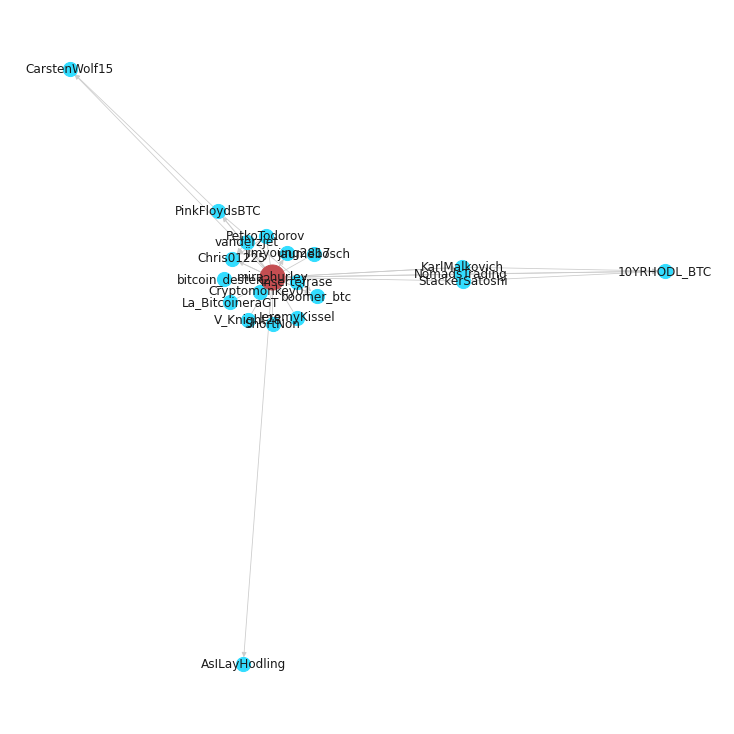

In [ ]:
# We can visualize mira_hurley's network as follows.
# Note that there are lots of parameters to adjust how things look.
plt.figure(figsize=(10, 10))
# Calculate the best position for laying out the nodes graphically.
pos = nx.spring_layout(H, k=5) # k controls how far apart nodes are forced to be
nx.draw(H, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=200,
        edge_color='.8', width=0.8)
# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
EU_position = pos['mira_hurley']
plt.plot(EU_position[0], EU_position[1], 'ro', markersize=25)
plt.show()

As shown in the above figure, mira_hurley has 33 edges and 21 nodes. In this case we see that there are several users that are connected to mira_hurley but as we can see some of these users are also connected to both mira_hurley but also PinkFloydsBTC who is also connected to CarstenWolf15 and mira_hurley.

#Conclusions/Discussions

The difficulties of this problem are that we can never be sure that our sentiment analysis successfully filters through all of the tweets correctly. For example, one day someone tweeted "if Bitcoin reaches 20k I will quit my job". Even though this is a positive sentiment towards Bitcoin using words like quit can lower the sentiment polarity. Also, we can never be sure that someone is talking about something else, but they include eth or Binance or any of the words in our search parameters. However, we know that our results from our sentiment analysis are accurate. Even if we could not gather the data from CoinMarketCap, we can still load our notebook and always find different sentiments. For example one day Binance coin plummeted, but a few days later it sharply rose. As we previously mentioned in part 1 of our analysis, this was reflected by our sentiment analysis graph, which shows that our results are significant. 

The easiest way to improve our research is to do what we initially wanted to: scrape data from both CoinMarketCap and Twitter, log the time and see if our Twitter sentiment analysis can predict coin behavior. This is definitely an interesting project for the future.

Once we spoke to Dr. Spurlock and changed our goals for this project, we were successfully able to scrape Twitter data, perform sentiment analysis, social network analysis, and a network of word occurrence. Because we were able to not only apply what we have learned to a real world problem, we were also curious enough to look at other tutorials to learn new things. For this reason, we believe that we have reached our high target.